In [1]:
import numpy as np    
import pandas as pd    
import matplotlib.pyplot as plt  
import os  
import cartopy.crs as ccrs  
import cartopy.feature as cfeature  
import matplotlib.ticker as mticker  
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [2]:
df_0 = pd.read_excel(r'D:\ze_1112\最新数据\NORC2022-09_Chl-a+营养盐_20240422更新_绘图使用数据.xls')
# df.dropna(inplace=True)
df_0 = df_0.rename(columns={'站位':'站位名'})
df_0

,站位名,水深（m）,叶绿素浓度（μg/L）,NH4+-N (μmol/L),NO3-N (μmol/L),NO2-N (μmol/L),PO4-P (μmol/L),SiO4-Si (μmol/L)
0,QB08,5,0.032143,0.03,0.0703,0.0267,0.1073,1.2367
1,QB08,75,0.068734,未检出,0.1103,0.0067,0.1083,1.2567
2,QB08,150,NaN,未检出,0.7503,0.0567,0.1643,1.5367
3,QB08,700,NaN,未检出,35.48333,0.02,2.31,72.4100
4,QB08,1000,NaN,未检出,38.73333,0.02,2.51,104.7600
...,...,...,...,...,...,...,...,...
493,N21-10,1000,NaN,未检出,38.24333,0.02,2.58,114.5600
494,N21-10,2000,NaN,未检出,38.24333,0.02,2.51,139.5000
495,N21-10,3000,NaN,未检出,37.68333,0.02,2.5,140.1100
496,N21-10,4000,NaN,未检出,36.28333,0.03,2.32,137.5900


In [3]:
stations = []
for i in df_0['站位名']:
    stations.append(i)
stations = list(set(stations))
print(stations)

['E130-12', 'N21-12', 'E130-14', 'E163-02', 'N21-10', 'E163-05', 'N21-13', 'E140-11', 'N03-04', 'QB03', 'N21-14', 'E130-08', 'E130-13', 'E163-06', 'E130-05', 'E163-03', 'E130-03', 'E163-06s', 'QB04', 'E130-02', 'N03-02', 'E140-08', 'E163-01', 'N03-03', 'E140-07', 'N21-11', 'E140-03orQB01', 'E130-11', 'FB01', 'E130-07', 'E163-07', 'E163-04', 'E163-04s', 'E130-09', 'E130-06', 'QB06', 'E130-04', 'E130-10', 'QB08', 'QB07']


In [4]:
def dms_to_decimal(dms):
    """将度分秒转换为十进制度数"""
    dms = dms.replace('°', ' ').replace('′', ' ').replace('″', ' ').replace('"E', ' ').replace('"N', ' ').replace('"S', ' ')
    parts = dms.split()
    degrees = float(parts[0])
    minutes = float(parts[1]) if len(parts) > 1 else 0
    seconds = float(parts[2]) if len(parts) > 2 else 0
    decimal = degrees + (minutes / 60) + (seconds / 3600)
    return decimal

In [69]:
################################绘制plot################################################
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 26

for station in stations:
    # print(station)
    data = df_0[df_0['站位名'] == station]
    depth = data['水深（m）'].values
    sio4 = data['SiO4-Si  (μmol/L)'].values
    fig = plt.figure(figsize=(7, 12))
    ax = fig.add_subplot(111)
    ax.plot(sio4, depth, linewidth=5)
    ax.xaxis.set_major_locator(MultipleLocator(10))
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_major_locator(MultipleLocator(1000))
    ax.yaxis.set_minor_locator(MultipleLocator(200))
    ax.tick_params(which='major', length=10, width=2, labelsize=20)
    ax.tick_params(which='minor', length=5, width=1, labelsize=20)
    plt.ylabel('Depth (m)')
    plt.xlabel('SiO4-Si (μmol/L)')
    plt.yticks(rotation=60, fontsize=24)
    plt.xticks((0, 50, 100, 160), fontsize=24)
    plt.ylim(0,6000)
    plt.xlim(0, 160)
    
    # for i in range(len(depth)):
    #     ax.text(sio4[i], depth[i], float(sio4[i]), ha='center', va='baseline', fontsize=20)
            
    ax.spines[:].set_linewidth(2)
    ax.invert_yaxis()

    plt.savefig(f'2024cruice_{station}.png', dpi=300, bbox_inches='tight')
    plt.close()
    

In [14]:
stations_ctd = os.listdir(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表')
lonlat = []  
for i in stations_ctd:
    if i.endswith('.xls'):
        df = pd.read_excel(r'D:\ze_1112\最新数据\CTD补上溶解氧_04共享航次计划调查资料汇交表\%s' % i, skiprows=1, header=1)
        df = df.drop(0)
        longitude = df['经度'].apply(dms_to_decimal).values # type: ignore
        latitude = df['纬度'].apply(dms_to_decimal).values  # type: ignore
        name = df['站位名'].values
        o2 = df['溶解氧'].values
        depth = df['水深'].values
        lonlat.append((longitude[3], latitude[3], name[3]))
lonlat = pd.DataFrame(lonlat, columns=['lon', 'lat', '站位名'])
data_path = pd.merge( lonlat, df_0, on='站位名')


In [7]:
# 自定义刻度格式化函数
def lon_formatter(x, pos):
    if x < 0:
        return f'{abs(int(x))}°W'
    elif x > 180:
        return f'{360-int(x)}°W'
    else:
        return f'{int(x)}°E'

def lat_formatter(x, pos):
    if x > 0:
        return f'{int(x)}°N' 
    else:
        return f'{int(x)}°S'

            lon        lat      站位名  水深（m） 叶绿素浓度（μg/L） NH4+-N (μmol/L)  \
161  130.000919  10.001092  E130-12   5944         NaN             未检出   

    NO3-N   (μmol/L) NO2-N   (μmol/L) PO4-P   (μmol/L)  SiO4-Si  (μmol/L)  
161         36.59333             0.02             2.35             139.72  
            lon        lat     站位名  水深（m） 叶绿素浓度（μg/L） NH4+-N (μmol/L)  \
434  127.999422  20.997692  N21-12   4045         NaN             未检出   

    NO3-N   (μmol/L) NO2-N   (μmol/L) PO4-P   (μmol/L)  SiO4-Si  (μmol/L)  
434         36.24333             0.02             2.36             140.08  
            lon       lat      站位名  水深（m） 叶绿素浓度（μg/L） NH4+-N (μmol/L)  \
191  130.000761  7.999492  E130-14   5635         NaN             未检出   

    NO3-N   (μmol/L) NO2-N   (μmol/L) PO4-P   (μmol/L)  SiO4-Si  (μmol/L)  
191         36.56333             0.02             2.35             143.18  
            lon       lat      站位名  水深（m） 叶绿素浓度（μg/L） NH4+-N (μmol/L)  \
267  163.002219  3.001739  E

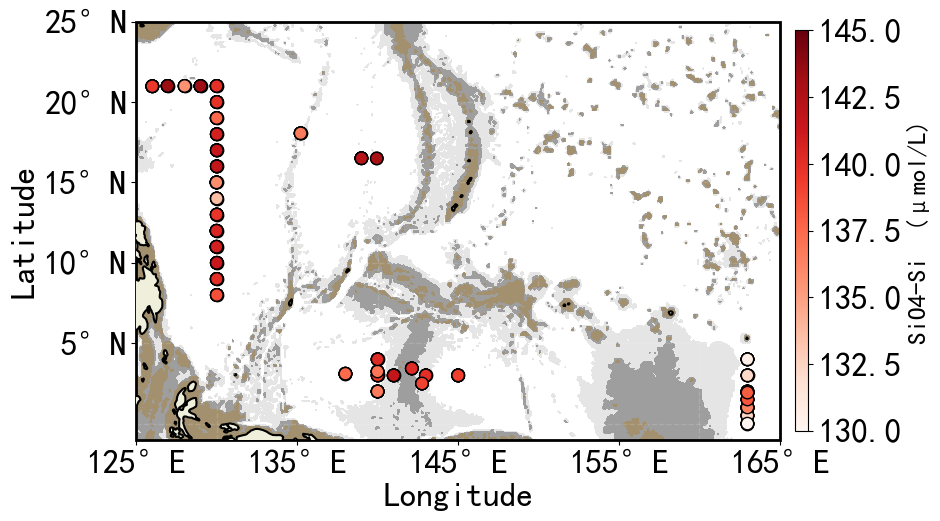

In [10]:
#####################################绘制scatter###############################################
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
plt.rcParams['font.size'] = 24

stations_path = []
for i in data_path['站位名']:
    stations_path.append(i)
stations_path = list(set(stations))
# print(stations_path)
# 获得最大水深

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection=ccrs.PlateCarree())
ax.set_extent([125, 165.001, -1, 25.001], crs=ccrs.PlateCarree())

for station_path in stations_path:
    data = data_path[data_path['站位名'] == station_path]
    max_depth = data['水深（m）'].max()
    # data_1 = data_path[(data_path['水深（m）'] >= 3500) & (data_path['水深（m）'] < 4600)]
    data_1 = data_path[data_path['水深（m）'] == max_depth] 
    print(data_1)
    station = data_1['站位名']
    lon = data_1['lon'].values
    lat = data_1['lat'].values
    sio4 = data_1['SiO4-Si  (μmol/L)'].values
    sc = ax.scatter(lon, lat, s=80, c=sio4, cmap='Reds', marker='o', alpha=1, edgecolors='k' , transform=ccrs.PlateCarree(), zorder=10, vmin=130, vmax=145)
    
ax.spines[:].set_linewidth(2)
ax.add_feature(cfeature.BORDERS, linewidth=2)
ax.add_feature(cfeature.COASTLINE, linewidth=2)
ax.add_feature(cfeature.RIVERS, linewidth=2)
ax.add_feature(cfeature.LAND, edgecolor='black', zorder=9)
#####################################################
import xarray as xr
ds = xr.open_dataset(r"E:\all_draw\data\Copernicus_bathy\cmems_mod_glo_phy_my_0.083deg_static_1720691864705.nc")
elevation = ds['deptho'].values
longitude = ds['longitude'].values
latitude = ds['latitude'].values
mask = elevation > 4000
mask_1 = elevation >2000
mask_2 = elevation > 3000
zhe_gai = ax.contourf(longitude, latitude, mask, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha=0.2)
zhe_gai_1 = ax.contourf(longitude, latitude, mask_1, levels=[0, 0.5], colors='orange', transform=ccrs.PlateCarree(), alpha=0.7)
zhe_gai_2 = ax.contourf(longitude, latitude, mask_2, levels=[0, 0.5], colors='grey', transform=ccrs.PlateCarree(), alpha=0.7)
######################################################
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
gl = ax.gridlines(draw_labels=False, linewidth=1, color='white', alpha=0.15, linestyle='--')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style = {'size': 15, 'color': 'black'}
gl.ylabel_style = {'size': 15, 'color': 'black'}
ax.set_xticks(np.arange(125, 165.001, 10))
ax.set_yticks(np.arange(5, 25.001, 5))
ax.xaxis.set_major_formatter(FuncFormatter(lon_formatter))
ax.yaxis.set_major_formatter(FuncFormatter(lat_formatter))
    
cbar = plt.colorbar(sc, ax=ax, orientation='vertical', pad=0.02, aspect=30, shrink=0.65)
cbar.set_label('SiO4-Si  (μmol/L)', fontsize=18)
    
plt.show()
# plt.savefig(r'E:\all_draw\7.10\2024\scatter\2024cruice_scatter_maxdepth_138-145.png', bbox_inches='tight', dpi=300)
# plt.close()